# 5. Combining arrays

We have already seen how to create arrays and how to modify their dimensions. One last operation we can do is to combine multiple arrays. There are two ways to do that: by assembling arrays of same dimensions (concatenation, stacking etc.) or by combining arrays of different dimensions using *broadcasting*. Like in the previous chapter, we illustrate with small arrays and a real image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
plt.gray();
image = skimage.data.chelsea()

<Figure size 432x288 with 0 Axes>

## 5.1 Arrays of same dimensions

Let's start by creating a few two 2D arrays:

In [2]:
array1 = np.ones((10,5))
array2 = 2*np.ones((10,3))
array3 = 3*np.ones((10,5))

### 5.1.1 Concatenation

The first operation we can perform is concatenation, i.e. assembling the two 2D arrays into a larger 2D array. Of course we have to be careful with the size of each dimension. For example if we try to concatenate ```array1``` and ```array2``` along the first dimension, we get:

In [3]:
np.concatenate([array1, array2])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 5 and the array at index 1 has size 3

Both array have 10 lines, but one has 3 and the other 5 columns. We can therefore only concatenate them along the second dimensions:

In [4]:
array_conc = np.concatenate([array1, array2], axis = 1)

In [5]:
array_conc.shape

(10, 8)

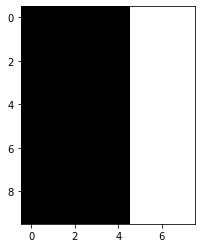

In [6]:
plt.imshow(array_conc, cmap = 'gray');

If we now use our example of real image, we can for example concatenate the two first channels of our RGB image:

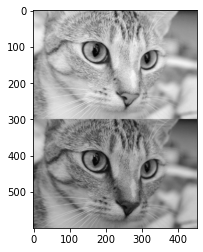

In [7]:
plt.imshow(np.concatenate([image[:,:,0], image[:,:,1]]));

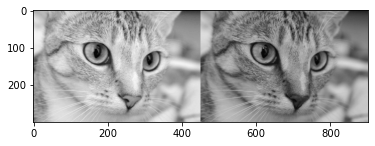

In [8]:
plt.imshow(np.concatenate([image[:,:,0], image[:,:,1]], axis=1));

### 5.1.2 Stacking

If we have several arrays with exact same sizes, we can also *stack* them, i.e. assemble them along a *new* dimension. For example we can create a 3D stack out of two 2D arrays:

In [9]:
array_stack = np.stack([array1, array3])

In [10]:
array_stack.shape

(2, 10, 5)

We can select the dimension along which to stack, again by using the ```axis``` keyword. For example if we want our new dimensions to be the *third* axis we can write:

In [11]:
array_stack = np.stack([array1, array3], axis = 2)

In [12]:
array_stack.shape

(10, 5, 2)

With our real image, we can for example stack the different channels in a new order (note that one could do that easily with ```np.swapaxis```):

In [13]:
image_stack = np.stack([image[:,:,2], image[:,:,0], image[:,:,1]], axis=2)

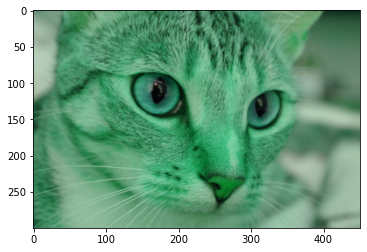

In [14]:
plt.imshow(image_stack);

As we placed the red channel, which has the highest intensity, at the position of the green one (second position) our image now is dominated by green tones.

## 5.2 Arrays of different dimensions

### 5.2.1 Broadcasting

Numpy has a powerful feature called **broadcasting**. This is the feature that for example allows you to write:

In [15]:
2 * array1

array([[2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]])

Here we just combined a single number with an array and Numpy *re-used* or *broadcasted* the element with less dimensions (the number 2) across the entire ```array1```. This does not only work with single numbers but also with arrays of different dimensions. Broadcasting can become very complex, so we limit ourselves here to a few common examples.

The general rule is that in an operation with arrays of different dimensions, **missing dimensions** or **dimensions of size 1** get *repeated* to create two arrays of same size. Note that comparisons of dimension size start from the **last** dimensions. For example if we have a 1D array and a 2D array:

In [16]:
array1D = np.arange(4)
array1D

array([0, 1, 2, 3])

In [17]:
array2D = np.ones((6,4))
array2D

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [18]:
array1D * array2D

array([[0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.],
       [0., 1., 2., 3.]])

Here ```array1D``` which has a *single line* got *broadcasted* over *each line* of the 2D array ```array2D```. Note the the size of each dimension is important. If ```array1D``` had for example more columns, that broadcasting could not work:

In [19]:
array1D = np.arange(3)
array1D

array([0, 1, 2])

In [20]:
array1D * array2D

ValueError: operands could not be broadcast together with shapes (3,) (6,4) 

As mentioned above, dimension sizes comparison start from the last dimension, so for example if ```array1D``` had a length of 6, like the first dimension of ```array2D```, broadcasting would fail:

In [21]:
array1D = np.arange(6)
array1D.shape

(6,)

In [22]:
array2D.shape

(6, 4)

In [23]:
array1D * array2D

ValueError: operands could not be broadcast together with shapes (6,) (6,4) 

### 5.2.2 Higher dimensions
Broadcasting can be done in higher dimensional cases. Imagine for example that you have an RGB image with dimensions $NxMx3$. If you want to modify each channel independently, for example to rescale them, you can use broadcasting. We can use again our real image:

In [24]:
image.shape

(300, 451, 3)

In [25]:
scale_factor = np.array([0.5, 0.1, 1])
scale_factor

array([0.5, 0.1, 1. ])

In [26]:
rescaled_image = scale_factor * image
rescaled_image

array([[[ 71.5,  12. , 104. ],
        [ 71.5,  12. , 104. ],
        [ 70.5,  11.8, 102. ],
        ...,
        [ 22.5,   2.7,  13. ],
        [ 22.5,   2.7,  13. ],
        [ 22.5,   2.7,  13. ]],

       [[ 73. ,  12.3, 107. ],
        [ 72.5,  12.2, 106. ],
        [ 71.5,  12. , 104. ],
        ...,
        [ 23. ,   2.9,  13. ],
        [ 22.5,   2.9,  13. ],
        [ 23.5,   3. ,  14. ]],

       [[ 74. ,  12.6, 112. ],
        [ 73.5,  12.5, 111. ],
        [ 73. ,  12.2, 109. ],
        ...,
        [ 24. ,   2.8,  17. ],
        [ 24.5,   2.9,  18. ],
        [ 25. ,   3. ,  19. ]],

       ...,

       [[ 46. ,   5.8,  30. ],
        [ 52.5,   7.1,  43. ],
        [ 66. ,   9.8,  71. ],
        ...,
        [ 86. ,  14.5, 138. ],
        [ 86. ,  14.5, 138. ],
        [ 86. ,  14.5, 138. ]],

       [[ 64. ,   9.2,  60. ],
        [ 69.5,  10.3,  71. ],
        [ 67. ,   9.5,  64. ],
        ...,
        [ 83. ,  14.2, 132. ],
        [ 83. ,  14.2, 132. ],
        [ 83.5,

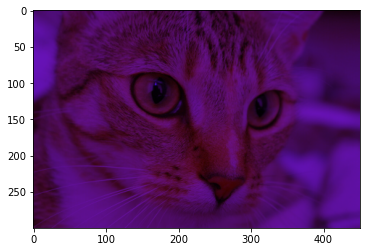

In [27]:
plt.imshow(rescaled_image.astype(int))

Note that if we the image has the dimensions $3xNxM$ (RGB planes in the first dimension), we encounter the same problem as before: a mismatch in size for the **last** dimension:  

In [28]:
image2 = np.rollaxis(image, axis=2)
image2.shape

(3, 300, 451)

In [29]:
scale_factor.shape

(3,)

In [30]:
scale_factor * image2

ValueError: operands could not be broadcast together with shapes (3,) (3,300,451) 

### 5.2.3 Adding axes
As seen above, if we have a mismatch in dimension size, the broadcasting mechanism doesn't work. To salvage such cases, we still have the possibility to *add* empty axes in an array to restore the matching of the non-empty dimension.

In the above example our arrays have the following shapes:

In [31]:
image2.shape

(3, 300, 451)

In [32]:
scale_factor.shape

(3,)

So we need to add two "empty" axes after the single dimension of ```scale_factor```:

In [33]:
scale_factor_corr = scale_factor[:, np.newaxis, np.newaxis]

In [34]:
scale_factor_corr.shape

(3, 1, 1)

In [35]:
image2_rescaled = scale_factor_corr * image2